In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('spam.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df=df.rename(columns={'v1':'target','v2':'text'})
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df.target)

In [8]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
df.duplicated().sum()

409

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5163 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5163 non-null   int64 
 1   text    5163 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.0+ KB


In [12]:
df.shape

(5163, 2)

In [13]:
df['target'].value_counts()

0    4516
1     647
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc490370190>,
 [Text(-1.0158507947047788, 0.42195635188686254, 'ham'),
  Text(1.0158508342111792, -0.4219562567760448, 'spam')],
 [Text(-0.5541004334753338, 0.23015801012010678, '87.5'),
  Text(0.5541004550242795, -0.23015795824147897, '12.5')])

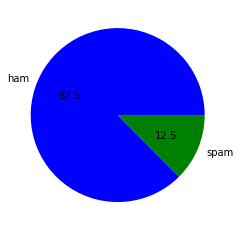

In [14]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],colors=['b','g'],autopct='%0.1f')

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
df['no_char']=df.text.apply(len)


In [17]:
df['no_word']=df.text.apply(lambda x:len(nltk.word_tokenize(x)))


In [18]:
df['no_sent']=df.text.apply(lambda x:len(nltk.sent_tokenize(x)))
df

,target,text,no_char,no_word,no_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [19]:
df[['no_char','no_word','no_sent']].describe

<bound method NDFrame.describe of       no_char  no_word  no_sent
0         111       23        2
1          29        8        2
2         155       37        2
3          49       13        1
4          61       15        1
...       ...      ...      ...
5567      160       35        4
5568       37        9        1
5569       57       15        2
5570      125       27        1
5571       26        7        2

[5163 rows x 3 columns]>

In [20]:
#analysis of ham messages
df[df['target']==0][['no_char','no_word','no_sent']].describe()

,no_char,no_word,no_sent
count,4516.000000,4516.000000,4516.000000
mean,70.428919,16.957484,1.815545
std,56.356310,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [21]:
#analysis of spam msg 
df[df['target']==1][['no_char','no_word','no_sent']].describe()

,no_char,no_word,no_sent
count,647.000000,647.000000,647.000000
mean,137.318393,27.465224,2.965997
std,30.096861,6.921829,1.490554
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,44.000000,9.000000


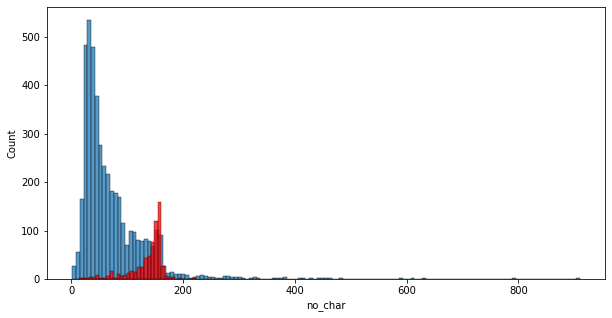

In [22]:
plt.figure(figsize=(10,5))
import seaborn as sns
sns.histplot(df[df['target']==0]['no_char'])
sns.histplot(df[df['target']==1]['no_char'],color='red')

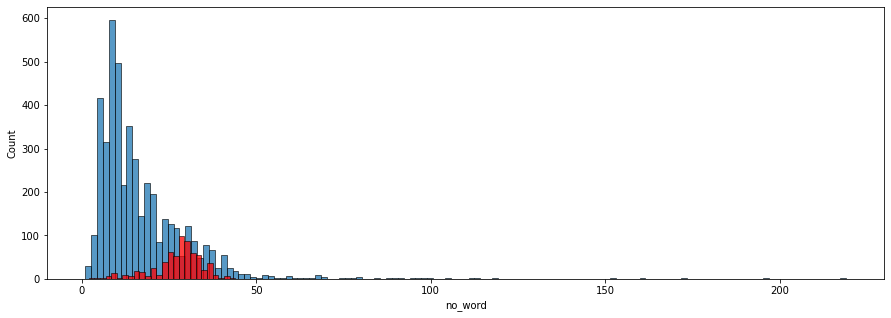

In [23]:
plt.figure(figsize=(15,5))
import seaborn as sns
sns.histplot(df[df['target']==0]['no_word'])
sns.histplot(df[df['target']==1]['no_word'],color='red')


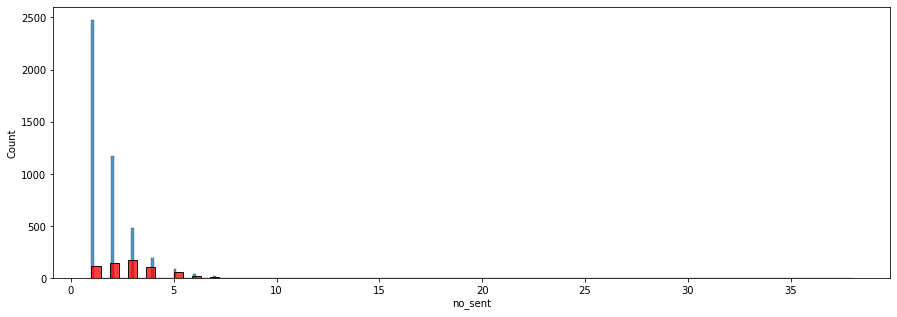

In [24]:
plt.figure(figsize=(15,5))
import seaborn as sns
sns.histplot(df[df['target']==0]['no_sent'])
sns.histplot(df[df['target']==1]['no_sent'],color='red')


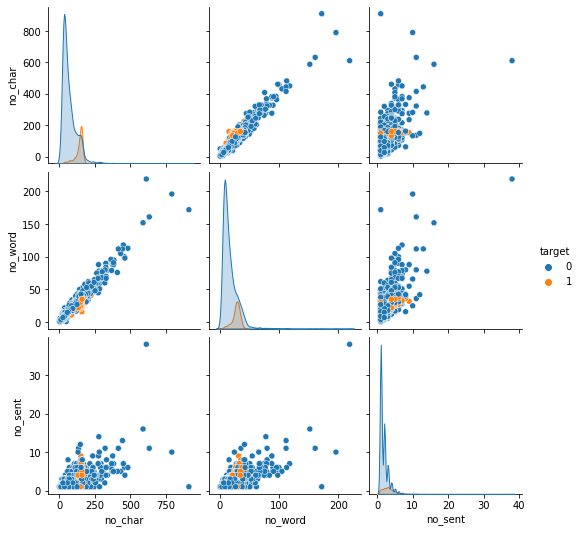

In [25]:
sns.pairplot(df,hue='target')

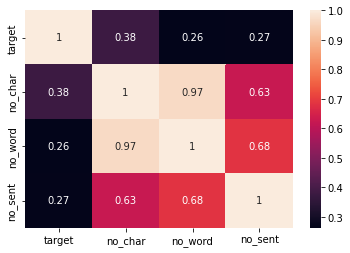

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
text='i am @SNEHA Baldeva living in badnawar'


In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
from nltk.corpus import stopwords
k=stopwords.words()
k

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [30]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('badnawar')

'badnawar'

In [32]:
def text_transformed(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
     y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in k and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  text=y[:]
  return' '.join(y)


In [33]:
df['text_transformed']=df['text'].apply(text_transformed)

In [34]:
df.head()

,target,text,no_char,no_word,no_sent,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi great world buffet ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,dun say earli hor alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,think goe usf live around though


In [35]:
from wordcloud import WordCloud


In [36]:
wc=WordCloud(width=500,height=100,min_font_size=9,background_color='white')
wc_ham=wc.generate(df[df['target']==0]['text_transformed'].str.cat(sep=''))


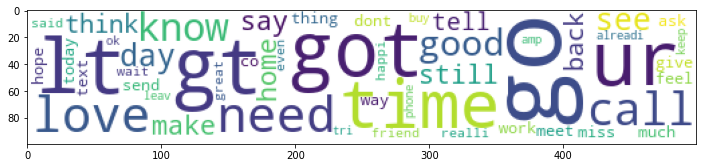

In [37]:
plt.figure(figsize=(12,12))
plt.imshow(wc_ham)

In [38]:
wc=WordCloud(width=500,height=100,min_font_size=9,background_color='white')
wc_spam=wc.generate(df[df['target']==1]['text_transformed'].str.cat(sep=''))


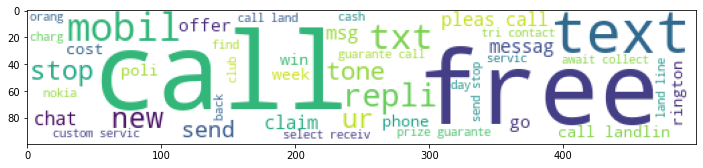

In [39]:
plt.figure(figsize=(12,12))
plt.imshow(wc_spam)

In [40]:
from collections import Counter

In [41]:
spam_corpus=[]
for msg in df[df['target']==1]['text_transformed'].to_list():
  for word in msg.split():
    spam_corpus.append(word)
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click', 'http', 'engla

In [42]:
ham_corpus=[]
for msg in df[df['target']==0]['text_transformed'].to_list():
  for word in msg.split():
    ham_corpus.append(word)
print(ham_corpus)

['go', 'jurong', 'point', 'avail', 'bugi', 'great', 'world', 'buffet', 'got', 'amor', 'ok', 'lar', 'joke', 'wif', 'dun', 'say', 'earli', 'hor', 'alreadi', 'say', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', 'copi', 'friend', 'callertun', 'gon', 'home', 'soon', 'talk', 'stuff', 'anymor', 'tonight', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'watch', 'eh', 'rememb', '2', 'spell', 'ye', 'naughti', 'make', 'wet', 'fine', 'way', 'feel', 'way', 'gota', 'b', 'serious', 'spell', 'go', 'tri', '2', 'month', 'joke', 'pay', 'first', 'lar', 'stock', 'comin', 'aft', 'finish', 'lunch', 'go', 'str', 'ard', '3', 'smth', 'finish', 'ur', 'lunch', 'alreadi', 'ffffffffff', 'alright', 'way', 'mee

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

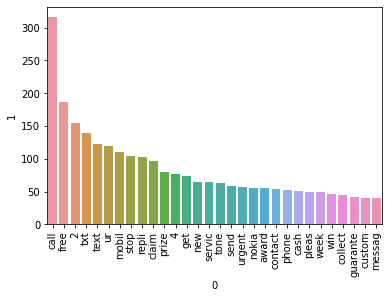

In [43]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

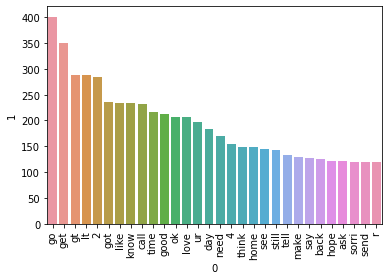

In [44]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [45]:
#model building 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv=CountVectorizer()
tf=TfidfVectorizer()
X=tf.fit_transform(df['text_transformed']).toarray()
X.shape
y=df.target.values
y

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [47]:
y_train

array([0, 0, 0, ..., 0, 1, 1])

In [48]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn import metrics

In [49]:
#gaussian nb
gb=GaussianNB()
gb.fit(X_train,y_train)


GaussianNB()

In [50]:
y_gb=gb.predict(X_test)
y_gb

array([1, 0, 1, ..., 0, 0, 1])

In [51]:
print(metrics.accuracy_score(y_gb,y_test))
print(metrics.confusion_matrix(y_gb,y_test))
print(metrics.precision_score(y_gb,y_test))

0.8431752178121975
[[754  24]
 [138 117]]
0.8297872340425532


In [52]:
#multinomail nb 
mb=MultinomialNB()
mb.fit(X_train,y_train)


MultinomialNB()

In [53]:
y_mb=mb.predict(X_test)
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
print(metrics.accuracy_score(y_mb,y_test))
print(metrics.confusion_matrix(y_mb,y_test))
print(metrics.precision_score(y_mb,y_test))

0.952565343659245
[[892  49]
 [  0  92]]
0.6524822695035462


In [55]:
#bernoulli nb 
b=BernoulliNB()
b.fit(X_train,y_train)


BernoulliNB()

In [56]:
y_b=b.predict(X_test)
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [57]:

print(metrics.accuracy_score(y_b,y_test))
print(metrics.confusion_matrix(y_b,y_test))
print(metrics.precision_score(y_b,y_test))


0.9661181026137464
[[888  31]
 [  4 110]]
0.7801418439716312


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestClassifier
from xgboost import XGBClassifier




In [59]:
svc = SVC(kernel='sigmoid', gamma=1.0) 
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5) 
lrc = LogisticRegression (solver='liblinear', penalty='l1') 
rfc = RandomForestClassifier(n_estimators=50, random_state=2) 
abc = AdaBoostClassifier (n_estimators=50, random_state=2) 
bc = BaggingClassifier (n_estimators=50, random_state=2) 
etc = ExtraTreesClassifier (n_estimators=50, random_state=2) 
godt = GradientBoostingClassifier (n_estimators=50, random_state=2) 
xgb = XGBClassifier (n_estimators=50, random_state=2)


In [60]:
print(svc.fit(X_train,y_train))
print(knc.fit(X_train,y_train))
print(dtc.fit(X_train,y_train))
print(rfc.fit(X_train,y_train))
print(abc.fit(X_train,y_train))
print(bc.fit(X_train,y_train))
print(etc.fit(X_train,y_train))
print(godt.fit(X_train,y_train))
print(xgb.fit(X_train,y_train))




SVC(gamma=1.0, kernel='sigmoid')
KNeighborsClassifier()
DecisionTreeClassifier(max_depth=5)
RandomForestClassifier(n_estimators=50, random_state=2)
AdaBoostClassifier(random_state=2)
BaggingClassifier(n_estimators=50, random_state=2)
ExtraTreesClassifier(n_estimators=50, random_state=2)
GradientBoostingClassifier(n_estimators=50, random_state=2)
XGBClassifier(n_estimators=50, random_state=2)


In [71]:
print(lrc.fit(X_train,y_train))

LogisticRegression(penalty='l1', solver='liblinear')


In [61]:
#support vector system  
SVC=svc.predict(X_test)
print(metrics.accuracy_score(SVC,y_test))
print(metrics.confusion_matrix(SVC,y_test))
print(metrics.precision_score(SVC,y_test))


0.968054211035818
[[888  29]
 [  4 112]]
0.7943262411347518


In [62]:
#kernel neighbour  classifier 
K=knc.predict(X_test)
print(metrics.accuracy_score(K,y_test))
print(metrics.confusion_matrix(K,y_test))
print(metrics.precision_score(K,y_test))


0.9022265246853823
[[892 101]
 [  0  40]]
0.28368794326241137


In [63]:
#decision tree classifier 
DTC=dtc.predict(X_test)
print(metrics.accuracy_score(DTC,y_test))
print(metrics.confusion_matrix(DTC,y_test))
print(metrics.precision_score(DTC,y_test))


0.9419167473378509
[[873  41]
 [ 19 100]]
0.7092198581560284


In [64]:
#random forest classifier 
RFC=rfc.predict(X_test)
print(metrics.accuracy_score(RFC,y_test))
print(metrics.confusion_matrix(RFC,y_test))
print(metrics.precision_score(RFC,y_test))


0.9690222652468539
[[892  32]
 [  0 109]]
0.7730496453900709


In [65]:
#ada boost classifier 
ABC=abc.predict(X_test)
print(metrics.accuracy_score(ABC,y_test))
print(metrics.confusion_matrix(ABC,y_test))
print(metrics.precision_score(ABC,y_test))


0.9554695062923524
[[882  36]
 [ 10 105]]
0.7446808510638298


In [66]:
#bagging classifier 
BC=bc.predict(X_test)
print(metrics.accuracy_score(BC,y_test))
print(metrics.confusion_matrix(BC,y_test))
print(metrics.precision_score(BC,y_test))


0.9612778315585673
[[873  21]
 [ 19 120]]
0.851063829787234


In [67]:
#extra tree classifier 
ETC=etc.predict(X_test)
print(metrics.accuracy_score(ETC,y_test))
print(metrics.confusion_matrix(ETC,y_test))
print(metrics.precision_score(ETC,y_test))


0.9641819941916747
[[887  32]
 [  5 109]]
0.7730496453900709


In [68]:
#gradient boosting classifier
GBC=godt.predict(X_test)
print(metrics.accuracy_score(GBC,y_test))
print(metrics.confusion_matrix(GBC,y_test))
print(metrics.precision_score(GBC,y_test))


0.9448209099709584
[[887  52]
 [  5  89]]
0.6312056737588653


In [69]:
#XGB classifier
XGB=xgb.predict(X_test)
print(metrics.accuracy_score(XGB,y_test))
print(metrics.confusion_matrix(XGB,y_test))
print(metrics.precision_score(XGB,y_test))


0.9419167473378509
[[885  53]
 [  7  88]]
0.624113475177305
